In [226]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statistics
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [227]:

df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\Final Project Fantasy Football\qbdata.csv")
# print("DF before KNN Imputation")
# print(df.describe())
df = df.drop(columns = ['name', 'gp_21', 'projected22', 'owners21', 'team21', 'pos21', 'owned22', 'project20', 'actual21', 'passyd_21', 'passtds21', 'int21', 
                        'runyds21', 'runtds21', 'run1st21', 'rec21', 'recyds21', 'rectds21', 'pass1st21', 'returnyds21', 
                       'returntds21', 'twopoint21', 'fumble21', 'pick21', 'salary21', 'project21', 'recepts20', 'recyds20',
                       'rectd20', 'rec1st20', 'returnyds20', 'returntd20', 'recepts19', 'recyds19', 'rectd19', 'rec1st19',
                       'returnyds19', 'returntd19'], axis = 1)

# Define the dependent variable and column names
dependent_variable = 'points21'
#print(df[dependent_variable])
column_names = df.columns.tolist()

important_columns = [column_names]

#IMPUTING WITH KNN
# Specify the number of neighbors 
k_neighbors = 2

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=k_neighbors)

# Perform imputation
df_knn = knn_imputer.fit_transform(df)

# Convert the NumPy array back to a DataFrame
df = pd.DataFrame(df_knn, columns=df.columns)

# Function to identify outliers using IQR
def find_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Identify outliers for each column
outliers_dict = {}
outliers_dependent_var = find_outliers_iqr(df[dependent_variable])

# # Display the DataFrame without outliers in the dependent variable
# print("DataFrame without outliers in the dependent variable:")
# print(df[~outliers_dependent_var].describe())

# #Print the DataFrame with just the outliers
# print("Outliers")
# print(df[outliers_dependent_var].describe())

#Print a summary of the data after imputing
# print("DF After Imputing")
# print(df.describe())

#DF WITH ALL COLUMNS DROPPED
# df_filled = df.dropna()

# Remove rows with outliers in the dependent variable
df = df[~outliers_dependent_var]

X = df.drop(dependent_variable, axis = 'columns')
Y = df[dependent_variable]

print(df.describe())

#get summary of data and save it to a csv file
# df[important_columns].describe().to_csv('SummaryRaw.csv', index = False)
# df_filled[important_columns].describe().to_csv('SummaryFiltered.csv', index= False)



         points21       gp20    points20    actual20    passyds20   passtd20  \
count   26.000000  26.000000   26.000000   26.000000    26.000000  26.000000   
mean   275.268075  13.807692  264.210384   80.038462  3345.423077  23.307692   
std     95.952699   3.124346  102.655780   84.548439  1122.636189  11.945775   
min     56.849998   5.000000   67.339996    3.000000  1061.000000   6.000000   
25%    203.544997  12.250000  183.370002   15.250000  2637.000000  13.250000   
50%    283.500000  15.000000  268.990005   44.500000  3776.000000  26.000000   
75%    335.364990  16.000000  349.979992  118.750000  4251.750000  32.500000   
max    456.579990  16.000000  420.660000  329.000000  4740.000000  48.000000   

       passint20    rushyds20   rushtd20  rush1st20  ...    passyds19  \
count  26.000000    26.000000  26.000000  26.000000  ...    26.000000   
mean    9.269231   256.807692   3.346154  19.115385  ...  3530.961538   
std     3.353299   231.200349   2.637306  12.558111  ...   9

Correlation Matrix:
           points21      gp20  points20  actual20  passyds20  passtd20  \
points21   1.000000  0.248400  0.536404 -0.382644   0.370669  0.497819   
gp20       0.248400  1.000000  0.754225 -0.829018   0.762652  0.685414   
points20   0.536404  0.754225  1.000000 -0.925625   0.853350  0.906141   
actual20  -0.382644 -0.829018 -0.925625  1.000000  -0.910589 -0.829124   
passyds20  0.370669  0.762652  0.853350 -0.910589   1.000000  0.854766   
passtd20   0.497819  0.685414  0.906141 -0.829124   0.854766  1.000000   
passint20 -0.249953  0.428930  0.278797 -0.434722   0.431554  0.200557   
rushyds20  0.172603  0.316303  0.470801 -0.355073   0.057987  0.135872   
rushtd20   0.371545  0.275397  0.521864 -0.433643   0.225352  0.209786   
rush1st20  0.303519  0.384930  0.560809 -0.442361   0.139441  0.228796   
pt20       0.099207  0.067100  0.123218 -0.238051   0.179316  0.138192   
fumble20   0.005855  0.296612  0.256046 -0.367831   0.273010  0.106542   
pick20    -0.58396

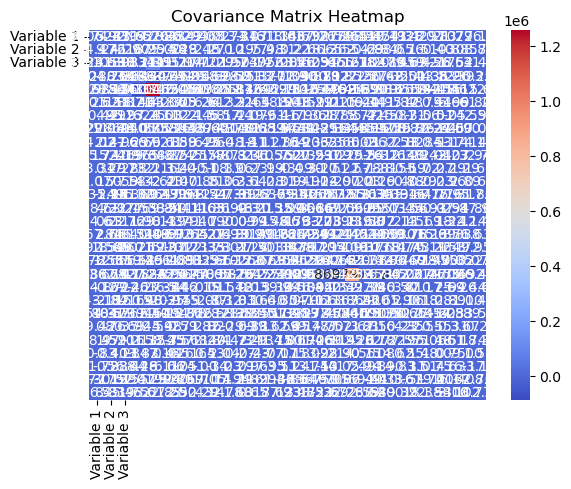

VIF Table:
     Variable  VIF
0        gp20  inf
1    points20  inf
2    actual20  inf
3   passyds20  inf
4    passtd20  inf
5   passint20  inf
6   rushyds20  inf
7    rushtd20  inf
8   rush1st20  inf
9        pt20  inf
10   fumble20  inf
11     pick20  inf
12   salary20  inf
13       gp19  inf
14   points19  inf
15   owners20  inf
16   actual19  inf
17  passyds19  inf
18   passtd19  inf
19  passint19  inf
20  rushyds19  inf
21   rushtd19  inf
22  rush1st19  inf
23       pt19  inf
24   fumble19  inf
25     pick19  inf
26   salary19  inf


C:\Users\benja\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [228]:

#Calculate the correlation matrix for all the independent variables, then narrow it down to X independent variables
correlation_matrix = df.corr()
correlation_X = df.corr()
print("Correlation Matrix:")
print(correlation_X)

#Calculate the covariance matrix, then narrowed down to X independent variables
numpy = df.to_numpy()
numpy_X = df.to_numpy()
covariance_matrix = np.cov(numpy_X, rowvar=False)
# Create a heatmap of the covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Variable 1', 'Variable 2', 'Variable 3'],
            yticklabels=['Variable 1', 'Variable 2', 'Variable 3'])
# Add labels and title
plt.title('Covariance Matrix Heatmap')
plt.show()

#Calculate the Variance Inflation Matrix(VIF) to find any multicollinearity
important_dfilled = df.drop(dependent_variable, axis = 'columns')
variables = important_dfilled.values
vif_values = [variance_inflation_factor(variables, i) for i in range(important_dfilled.shape[1])]
# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': important_dfilled.columns, 'VIF': vif_values})
print("VIF Table:")
print(vif_df)


In [229]:
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=30)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.2, 'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Mean Squared Error: 5489.362198620701
Mean Squared Error on Training Data: 2418.9927597493083
Mean Squared Error on Test Data: 10587.013226266738
R-squared: -1.6436344408548553


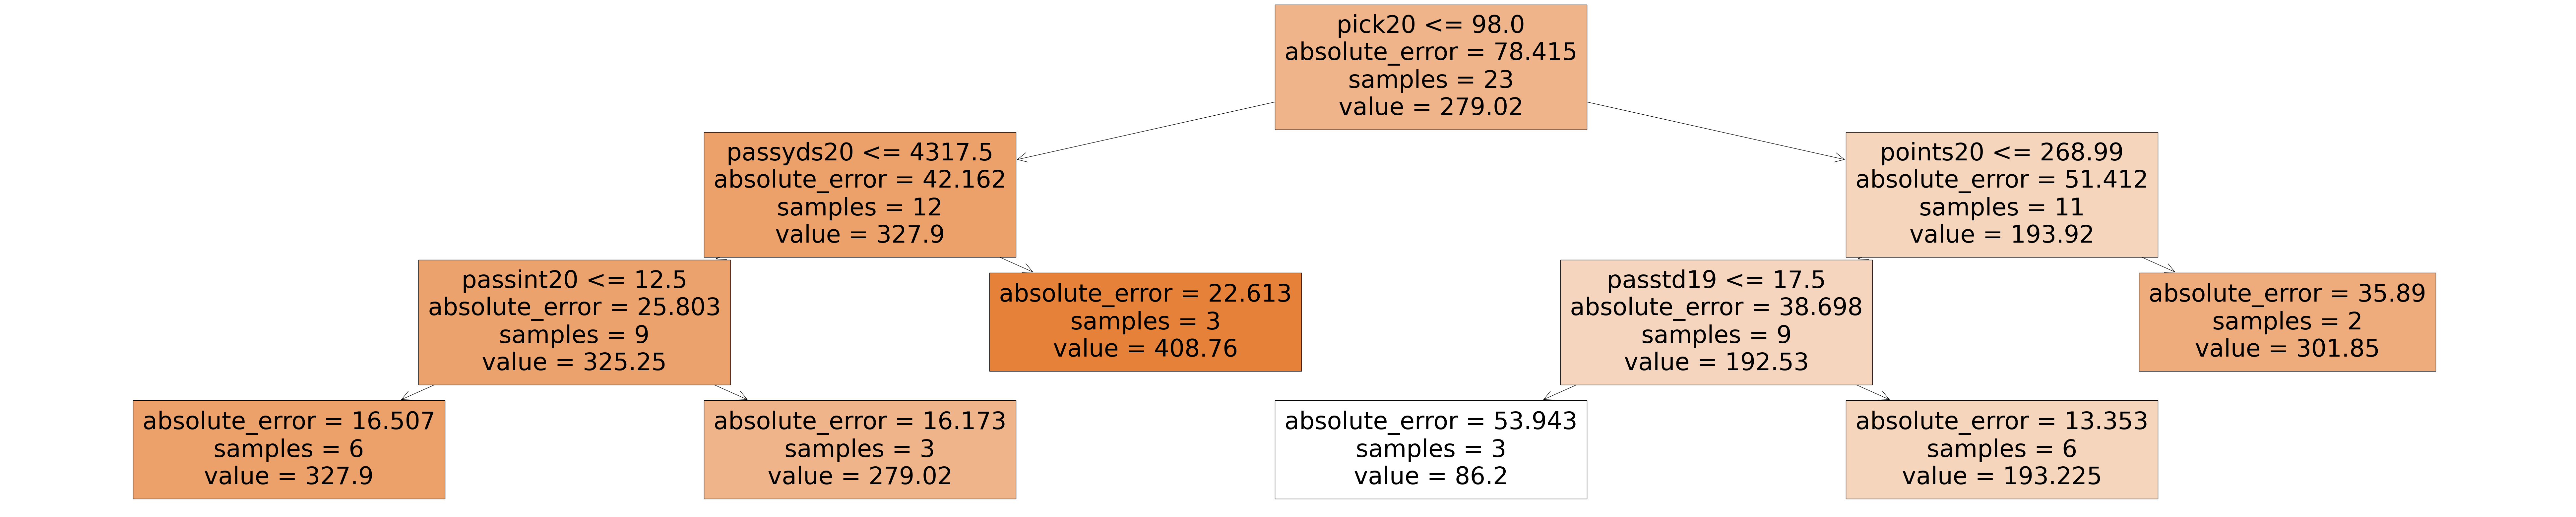

In [230]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = list(X.columns),  filled = True)
plt.show()

In [257]:
#PCA with all variables passed in
X_standardized = StandardScaler().fit_transform(X)
# Create a PCA instance
n = 10
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)
#print(pc_df)
# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
#final_df = pd.concat([df, pc_df], axis=1) # Add 'target' if available
# print(final_df)

Variance explained by each latent variable in PCA:  [0.33996621 0.18464473 0.12573501 0.07147708 0.05702594 0.04844739
 0.03715216 0.0290202  0.02200131 0.01916461]
   Explained Variance  Cumulative Explained Variance
0            9.546251                       9.546251
1            5.184824                      14.731075
2            3.530639                      18.261714
3            2.007077                      20.268791
4            1.601288                      21.870079
5            1.360403                      23.230482
6            1.043233                      24.273715
7            0.814887                      25.088602
8            0.617797                      25.706399
9            0.538142                      26.244541


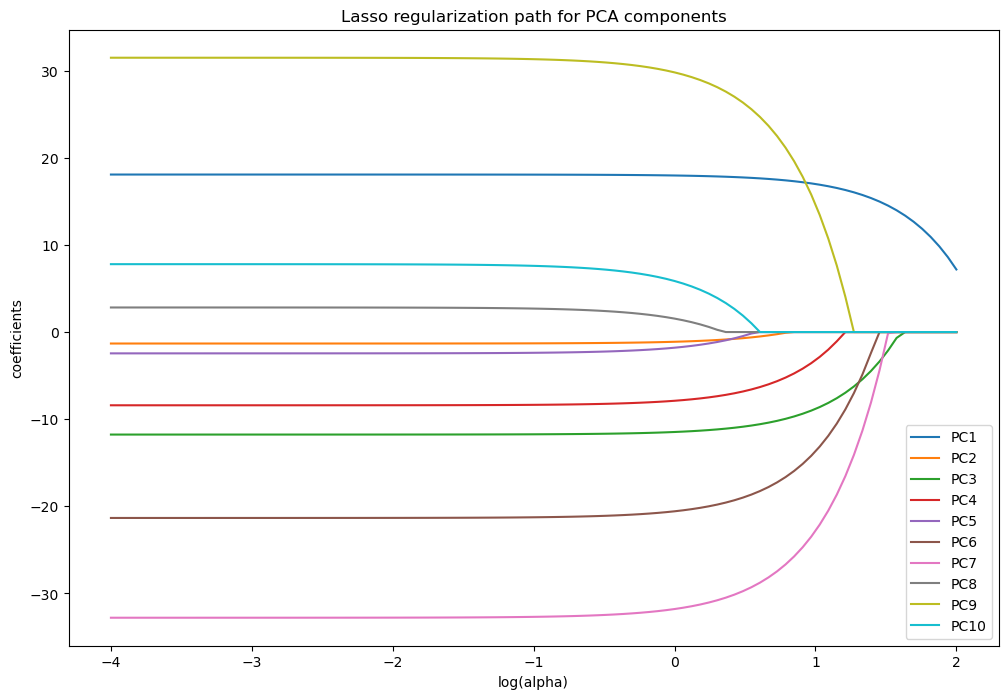

In [232]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(principal_components, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [265]:
#Lasso model with the PCA components
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(principal_components))  

# Fit the LassoCV model on the data
lasso_cv_model.fit(principal_components, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an array to store predictions
predictions = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(principal_components):
    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction
    predictions.append(y_pred[0])

# Calculate the mean squared error
mse = mean_squared_error(Y, predictions)

# Calculate R-squared for this alpha
r2 = r2_score(Y, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f}'
equation += ' + '
equation += ' + '.join([f'{coef:.4f} * PC{i + 1}' for i, coef in enumerate(lasso_model.coef_)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse}')
print(f'R-Squared: {r2}')
print(f'Equation: {equation}')

Optimal Alpha: 6.2464
Mean Squared Error (Lasso + LOOCV): 7048.197322181384
R-Squared: 0.2038461453890399
Equation: y = 276.7405 + 17.6079 * PC1 + -0.0000 * PC2 + -10.2192 * PC3 + -4.6855 * PC4 + -0.0000 * PC5 + -13.8783 * PC6 + -29.1070 * PC7 + 0.0000 * PC8 + 22.2538 * PC9 + 0.0000 * PC10


In [268]:
#Linear Regression with all PCA components
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, Y, test_size=0.2, random_state=30)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')
# Make predictions on the test set

# Calculate the test Mean Squared Error
test_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared for the test set
test_r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test R-Squared: {test_r2:.4f}')
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training Mean Squared Error: 3604.3562764979383
Training R-squared: 0.6455254405945083
Test Mean Squared Error: 1012.6920
Test R-Squared: 0.7437
Coefficients: [ 18.19572376  -0.5818849  -12.98566678  -8.37042997  -0.06187146
 -23.58875235 -32.64777666   1.44743464  31.16222009   0.46807429]
Intercept: 280.1202172134422


In [235]:
#PCA with passing yards
passing_columns = ['passyds20', 'passtd20', 'passint20', 'passyds19', 'passtd19', 'passint19']
X_standardized = StandardScaler().fit_transform(X[passing_columns])
# Create a PCA instance
n = 3
pca_passing = PCA(n_components=n) 
pca_passing.fit(X_standardized)
# Fit the PCA model to the standardized data
passing_pc = pca_passing.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['passingPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
passing_df = pd.DataFrame(data=passing_pc, columns=pc_columns)
#print(passing_df)
passing_columns_to_add = passing_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_passing.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_passing.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, passing_df[passing_columns_to_add]], axis=1) 
for column in passing_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.39652022 0.31703741 0.1533203 ]
   Explained Variance  Cumulative Explained Variance
0            2.474286                       2.474286
1            1.978313                       4.452600
2            0.956719                       5.409318
      points21  gp20    points20  actual20  rushyds20  rushtd20  rush1st20  \
0   325.250000  16.0  408.739990       4.0      819.0      11.0       52.0   
1   287.980010  15.0  374.780000      12.0     1005.0       7.0       56.0   
2   456.579990  16.0  420.660000       3.0      421.0       8.0       38.0   
3   192.530000  16.0  265.420010      47.0      165.0       1.0       18.0   
4   178.280000  12.0  143.020000     182.0      217.0       2.0       13.0   
5   328.239990  10.0  181.720000     121.0      142.0       3.0       14.0   
6   327.560000   5.0  140.270000     188.0       93.0       3.0        8.0   
7   259.820010  16.0  380.780000      10.0      513.0       2.0       25.0   

In [236]:
#PCA with rushing yards
rushing_columns = ['rushyds20', 'rushtd20', 'rush1st20', 'rushyds19', 'rushtd19', 'rush1st19']
X_standardized = StandardScaler().fit_transform(X[rushing_columns])
# Create a PCA instance
n = 2
pca_rushing = PCA(n_components=n) 
pca_rushing.fit(X_standardized)
# Fit the PCA model to the standardized data
rushing_pc = pca_rushing.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['rushingPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
rushing_df = pd.DataFrame(data=rushing_pc, columns=pc_columns)
rushing_columns_to_add = rushing_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_rushing.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_rushing.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, rushing_df[rushing_columns_to_add]], axis=1)
for column in rushing_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.77693219 0.10829867]
   Explained Variance  Cumulative Explained Variance
0            4.848057                       4.848057
1            0.675784                       5.523841
      points21  gp20    points20  actual20  pt20  fumble20  pick20  salary20  \
0   325.250000  16.0  408.739990       4.0   0.0       4.0    36.0      38.0   
1   287.980010  15.0  374.780000      12.0   1.0       4.0    22.0      59.0   
2   456.579990  16.0  420.660000       3.0   0.0       6.0    77.0      24.0   
3   192.530000  16.0  265.420010      47.0   1.0       4.0   125.0      18.0   
4   178.280000  12.0  143.020000     182.0   1.0       2.0   182.0       2.0   
5   328.239990  10.0  181.720000     121.0   0.0       4.0    44.0      20.0   
6   327.560000   5.0  140.270000     188.0   2.0       3.0    20.0      33.0   
7   259.820010  16.0  380.780000      10.0   1.0       4.0    33.0      40.0   
8   198.500000  15.0  243.980000      58.0   

In [273]:
handpicked_df = df[['passingPC1', 'passingPC2', 'passingPC3', 'rushingPC1', 'rushingPC2', 'points20', 'points19']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(handpicked_df, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')
# Calculate the test Mean Squared Error
test_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared for the test set
test_r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test R-Squared: {test_r2:.4f}')
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training Mean Squared Error: 3264.637789297113
Training R-squared: 0.6736940847616122
Test Mean Squared Error: 14607.7650
Test R-Squared: -2.2659
Coefficients: [ 2.71375864e+01 -1.05167186e+02 -7.81644587e+01  3.44232935e+01
  4.27803031e+01  1.04316369e-01 -1.66798259e+00]
Intercept: 698.9861588334984


In [264]:
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(handpicked_df), random_state=42)

# Fit the LassoCV model on the data
lasso_cv_model.fit(handpicked_df, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize arrays to store results
predictions = []
true_values = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(handpicked_df):
    X_train, X_test = handpicked_df.iloc[train_index], handpicked_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction and true value
    predictions.append(y_pred[0])
    true_values.append(y_test.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(true_values, predictions)

# Calculate R-squared
r2 = r2_score(true_values, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f} + ' + ' + '.join([f'{coef:.4f} * {col}' for coef, col in zip(lasso_model.coef_, handpicked_df.columns)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Equation: {equation}')




Optimal Alpha: 311.7297
Mean Squared Error (Lasso + LOOCV): 7655.9128
R-Squared: 0.1352
Equation: y = 85.6761 + 0.0000 * passingPC1 + -0.0000 * passingPC2 + -0.0000 * passingPC3 + -0.0000 * rushingPC1 + 0.0000 * rushingPC2 + 0.3806 * points20 + 0.3451 * points19


In [ ]:

# # Plot y-values against indices
# plt.plot(Y, marker='o')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Y-values')
# plt.title('One-Dimensional Plot of Y-values')

# # Show the plot
# plt.show()

# # Create scatter plots for each column with respect to the dependent variable
# for column in column_names:
#    plt.figure(figsize=(8, 6))
#    plt.scatter(df[column], df[dependent_variable], alpha=0.5)
#    plt.title(f'Scatter Plot of {column} vs. {dependent_variable}')
#    plt.xlabel(column)
#    plt.ylabel(dependent_variable)
#    plt.grid(True)
# #   plt.savefig(f'plot_{column}.png', dpi=300)
#    plt.show()

In [ ]:
#Create LINEAR REGRESSION MODEL FROM OLS
x = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Get the coefficients and variable names
coefficientsOLS = model.params  # Include the intercept
variable_names = X
equation = " + ".join(f"{b:.4f}*{var}" for b, var in zip(coefficientsOLS, variable_names))
print(model.summary())